In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [12]:
wcat=pd.read_csv("Datasets/wc-at.csv")

In [16]:
x = wcat["Waist"]
y = wcat["AT"]
x.head(5)

0    74.75
1    72.60
2    81.80
3    83.95
4    74.65
Name: Waist, dtype: float64

In [6]:
model1 = LinearRegression()

In [7]:
model1.fit(x,y) # It's throwing an error cause we have to supply a two dimensional array

ValueError: Expected 2D array, got 1D array instead:
array=[ 74.75  72.6   81.8   83.95  74.65  71.85  80.9   83.4   63.5   73.2
  71.9   75.    73.1   79.    77.    68.85  75.95  74.15  73.8   75.9
  76.85  80.9   79.9   89.2   82.    92.    86.6   80.5   86.    82.5
  83.5   88.1   90.8   89.4  102.    94.5   91.   103.    80.    79.
  83.5   76.    80.5   86.5   83.   107.1   94.3   94.5   79.7   79.3
  89.8   83.8   85.2   75.5   78.4   78.6   87.8   86.3   85.5   83.7
  77.6   84.9   79.8  108.3  119.6  119.9   96.5  105.5  105.   107.
 107.   101.    97.   100.   108.   100.   103.   104.   106.   109.
 103.5  110.   110.   112.   108.5  104.   111.   108.5  121.   109.
  97.5  105.5   98.    94.5   97.   105.   106.    99.    91.   102.5
 106.   109.1  115.   101.   100.1   93.3  101.8  107.9  108.5 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
X = wcat.Waist.values.reshape(-1,1)
Y = wcat.AT.values.reshape(-1,1)  # Target can and always be single, so actually no need to reshape
X[0:5]

array([[74.75],
       [72.6 ],
       [81.8 ],
       [83.95],
       [74.65]])

In [18]:
model1.fit(X,Y)

LinearRegression()

In [19]:
pred1 = model1.predict(X)

In [20]:
# Adjusted R-Squared value
model1.score(X,Y)# 0.6700

0.6700368930528429

In [21]:
rmse1 = np.sqrt(np.mean((pred1-Y)**2)) # 32.760
rmse1

32.760177495755144

In [22]:
model1.coef_

array([[3.45885939]])

In [23]:
model1.intercept_

array([-215.98148796])

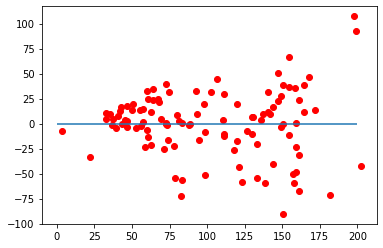

In [24]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred1,(pred1-Y),c="r")
plt.hlines(y=0,xmin=0,xmax=200) 

(array([ 3.,  8.,  6., 14., 33., 27., 14.,  2.,  0.,  2.]),
 array([-90.34239241, -70.57934363, -50.81629486, -31.05324609,
        -11.29019731,   8.47285146,  28.23590023,  47.99894901,
         67.76199778,  87.52504655, 107.28809533]),
 <BarContainer object of 10 artists>)

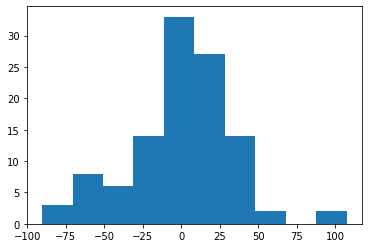

In [25]:
# checking normal distribution for residual
plt.hist(pred1-Y)

In [26]:
### Fitting Quadratic Regression 
wcat["Waist_sqrd"] = X*X
wcat.head()

,Waist,AT,Waist_sqrd
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225


In [27]:
X = wcat.iloc[:,[0,2]]
Y = np.log(wcat.AT)
X.head(5)
#Y = wcat.AT

,Waist,Waist_sqrd
0,74.75,5587.5625
1,72.60,5270.7600
2,81.80,6691.2400
3,83.95,7047.6025
4,74.65,5572.6225


In [28]:
model2 = LinearRegression()
model2.fit(X,Y)                 #here we are not doing log Transformation on AT like we have done using OLS quadratic model

LinearRegression()

In [29]:
pred2 = model2.predict(X)

In [30]:
pred2 = np.exp(pred2)

In [31]:
# Adjusted R-Squared value
model2.score(X,Y)# 0.67791

0.7789817667713609

In [32]:
rmse2 = np.sqrt(np.mean((pred2-np.exp(Y))**2)) #32.366
rmse2

32.244447827740416

In [33]:
model2.coef_


array([ 0.22886444, -0.00101629])

In [35]:
model2.intercept_

-7.824071382859394

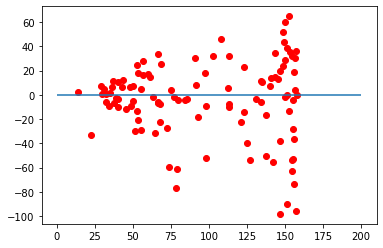

In [36]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred2,(pred2-np.exp(Y)),c="r")
plt.hlines(y=0,xmin=0,xmax=200)  

(array([ 3.,  2.,  9.,  4.,  9., 28., 27., 17.,  7.,  3.]),
 array([-98.21607953, -81.91743061, -65.61878168, -49.32013275,
        -33.02148382, -16.7228349 ,  -0.42418597,  15.87446296,
         32.17311188,  48.47176081,  64.77040974]),
 <BarContainer object of 10 artists>)

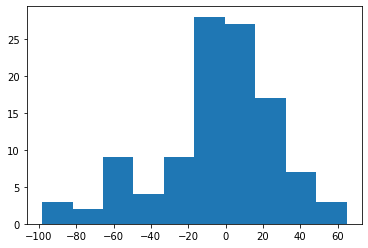

In [37]:
# Checking normal distribution
plt.hist(pred2-np.exp(Y))

Now you can work on other models taking these examples

((array([-2.49269012, -2.16005351, -1.96810538, -1.829376  , -1.71891041,
         -1.62614848, -1.54558238, -1.4739582 , -1.40918581, -1.34983904,
         -1.2948992 , -1.24361202, -1.19540258, -1.14982207, -1.10651298,
         -1.06518563, -1.02560179, -0.98756301, -0.95090206, -0.9154766 ,
         -0.88116436, -0.84785944, -0.81546946, -0.78391323, -0.75311899,
         -0.72302293, -0.69356797, -0.66470285, -0.63638125, -0.60856118,
         -0.58120436, -0.55427579, -0.52774332, -0.5015773 , -0.47575031,
         -0.45023686, -0.42501321, -0.40005714, -0.3753478 , -0.35086557,
         -0.32659187, -0.30250912, -0.27860058, -0.25485026, -0.23124286,
         -0.20776364, -0.18439842, -0.16113345, -0.13795538, -0.1148512 ,
         -0.09180817, -0.06881379, -0.04585574, -0.02292185,  0.        ,
          0.02292185,  0.04585574,  0.06881379,  0.09180817,  0.1148512 ,
          0.13795538,  0.16113345,  0.18439842,  0.20776364,  0.23124286,
          0.25485026,  0.27860058,  0.

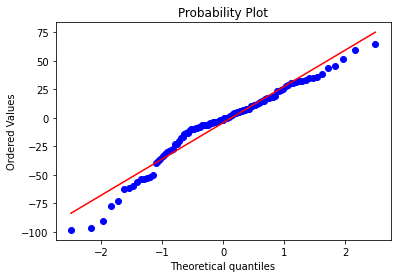

In [38]:
import pylab
import scipy.stats as st
st.probplot(pred2-np.exp(Y),dist="norm",plot=pylab)